## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
- Download the data of your choice.
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.
- Identify correlations between variables using correlation matrices and/or heatmaps.
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Solution:

In [1]:
# Your code goes here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import os
os.getcwd()

c:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'c:\\Users\\Sümeyye\\Desktop\\adalovelace\\week-3-exercise'

In [2]:
os.listdir(os.getcwd())

['df_data.csv', 'untitled0.py', 'week-3-exercise.ipynb']

In [3]:
data = pd.read_csv("df_data.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [4]:
print(data.head())
print(data.info())
print(data.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,535874.0,9.587927,153.292222,-74215.00,1.00,3.00,10.00,74215.0
UnitPrice,535874.0,4.636533,97.302232,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,403182.0,15287.687868,1714.009551,12346.00,13952.00,15152.00,16791.00,18287.0


Minimum değerler incelendiğinde miktar ve birim fiyatların 0 dan küçük değerlerin olduğunu görebiliyoruz. Dolayısıyla daha temiz bir veri seti için o sütunlara odaklanalım.


In [6]:
data[data["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1.0,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1.0,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [7]:
data[data["Quantity"] < 0].count().sum()

81792

In [8]:
data = data[(data["Quantity"] >= 0) & (data["UnitPrice"] >= 0)]
data.shape

(525327, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525327 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    525327 non-null  object 
 1   StockCode    525327 non-null  object 
 2   Description  524735 non-null  object 
 3   Quantity     525327 non-null  float64
 4   InvoiceDate  525327 non-null  object 
 5   UnitPrice    525327 non-null  float64
 6   CustomerID   394343 non-null  float64
 7   Country      525327 non-null  object 
dtypes: float64(3), object(5)
memory usage: 36.1+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525327.0,10.508301,111.237764,1.0,1.00,3.00,10.00,74215.00
UnitPrice,525327.0,3.916567,36.076946,0.0,1.25,2.08,4.13,13541.33
CustomerID,394343.0,15294.324923,1713.606332,12346.0,13969.00,15159.00,16795.00,18287.00


In [11]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1.0,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1.0,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1.0,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1.0,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1.0,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1.0,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1.0,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1.0,12/9/2011 11:34,2.10,14446.0,United Kingdom


Verilerin görsellerini yanıltan önemli noktalardan bir de tekrarlayan satırlardır. Bu satırları da silersek daha temiz bir veri seti görselleştirmesi yapılabilir.

In [12]:
data = data.drop_duplicates()
data.shape

(520141, 8)

In [13]:
data.shape

(520141, 8)

In [14]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 'InvoiceDate' sütununu indeks olarak ayarlama
data.set_index('InvoiceDate', inplace=True)

# DataFrame'i göster
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Datetime ile index hale getirdiğimiz InvoiceDate sütununda tarihlerin 2010 Aralık ayından 2011 aralık ayına kadar olduğunu görebiliriz

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520141 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    520141 non-null  object 
 1   StockCode    520141 non-null  object 
 2   Description  519549 non-null  object 
 3   Quantity     520141 non-null  float64
 4   UnitPrice    520141 non-null  float64
 5   CustomerID   389196 non-null  float64
 6   Country      520141 non-null  object 
dtypes: float64(3), object(4)
memory usage: 31.7+ MB


In [20]:
country_count =data["2010"].groupby("Country").sum()["Quantity"].sort_values(ascending=False).head();
country_count

C:\Users\Sümeyye\AppData\Local\Temp\ipykernel_11500\2610391169.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  country_count =data["2010"].groupby("Country").sum()["Quantity"].sort_values(ascending=False).head();


Country
United Kingdom    312228.0
Germany             6830.0
Netherlands         6715.0
EIRE                5702.0
France              4919.0
Name: Quantity, dtype: float64

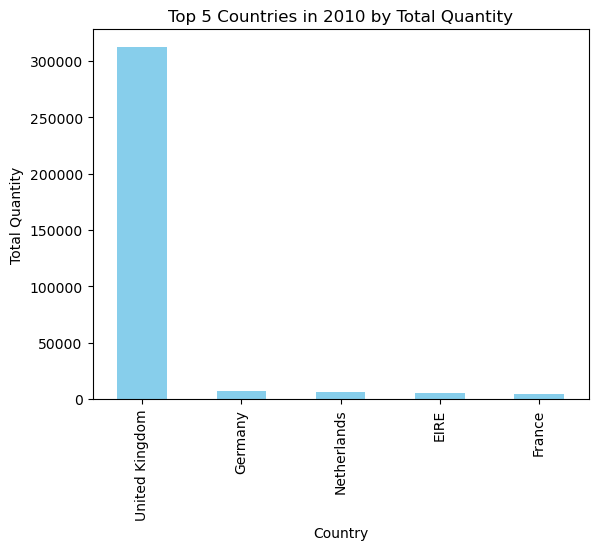

In [22]:
country_count.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Top 5 Countries in 2010 by Total Quantity')
plt.show()

In [28]:
country_count_2011 =data["2011"].groupby("Country").sum()["Quantity"].sort_values(ascending=False).head();
country_count_2011

C:\Users\Sümeyye\AppData\Local\Temp\ipykernel_11500\2861582493.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  country_count_2011 =data["2011"].groupby("Country").sum()["Quantity"].sort_values(ascending=False).head();


Country
United Kingdom    4274798.0
Netherlands        192434.0
EIRE               139443.0
Germany            111702.0
France             106751.0
Name: Quantity, dtype: float64

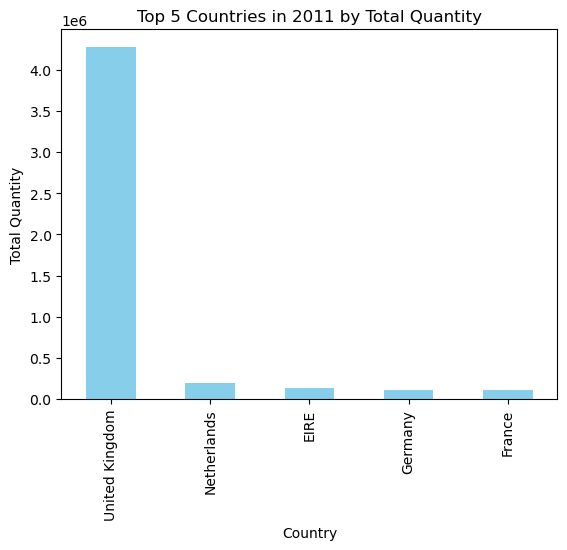

In [30]:
country_count_2011.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Top 5 Countries in 2011 by Total Quantity')
plt.show()

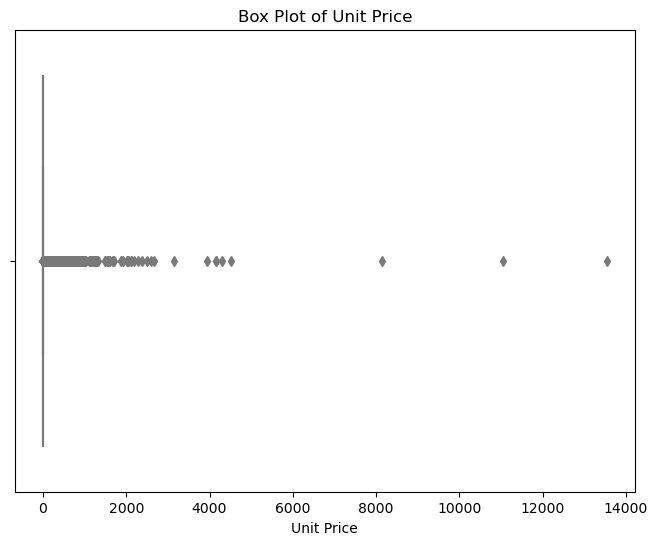

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='UnitPrice', data=data, color='lightblue')
plt.xlabel('Unit Price')
plt.title('Box Plot of Unit Price')
plt.show()

In [31]:
price_count_2010 =data["2010"].groupby("Country").mean()["UnitPrice"].sort_values(ascending=False).head();
price_count_2010

C:\Users\Sümeyye\AppData\Local\Temp\ipykernel_11500\1238236613.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  price_count_2010 =data["2010"].groupby("Country").mean()["UnitPrice"].sort_values(ascending=False).head();


Country
Channel Islands    9.449412
Austria            8.087500
Italy              5.175000
EIRE               4.983117
United Kingdom     4.915622
Name: UnitPrice, dtype: float64

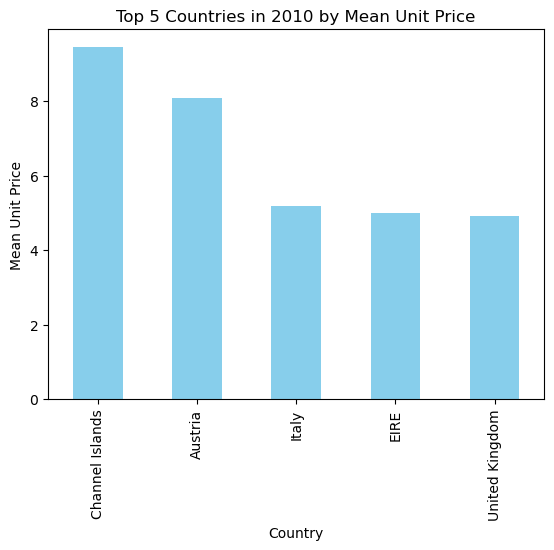

In [33]:
price_count_2010.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Unit Price')
plt.title('Top 5 Countries in 2010 by Mean Unit Price')
plt.show()

In [34]:
price_count_2011 =data["2011"].groupby("Country").mean()["UnitPrice"].sort_values(ascending=False).head();
price_count_2011

C:\Users\Sümeyye\AppData\Local\Temp\ipykernel_11500\2446700890.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  price_count_2011 =data["2011"].groupby("Country").mean()["UnitPrice"].sort_values(ascending=False).head();


Country
Singapore    58.547692
Hong Kong    23.952310
Cyprus        6.324205
Canada        6.148163
Portugal      6.008118
Name: UnitPrice, dtype: float64

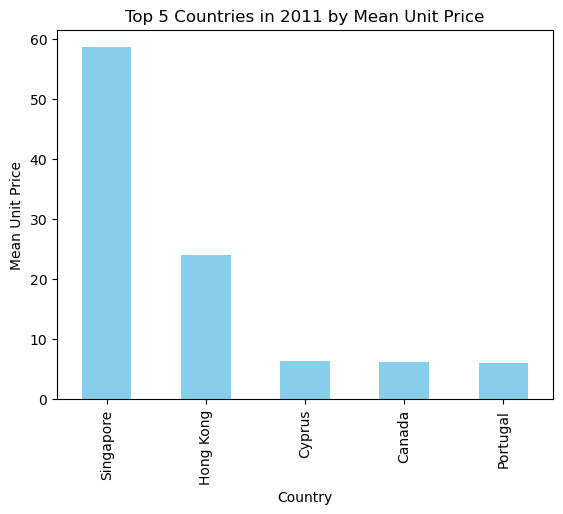

In [35]:
price_count_2011.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Unit Price')
plt.title('Top 5 Countries in 2011 by Mean Unit Price')
plt.show()

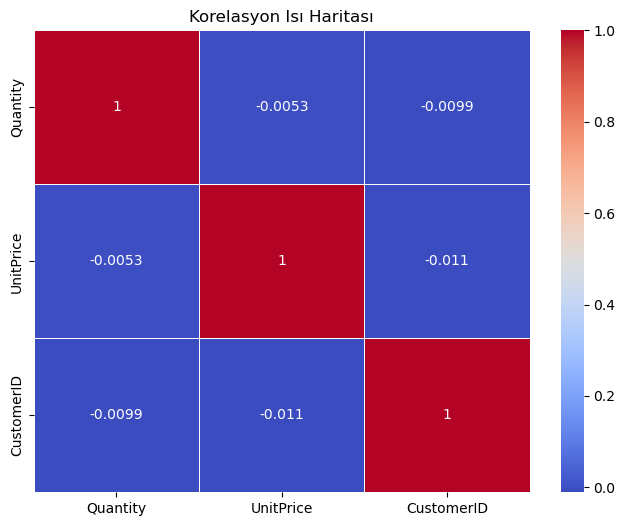

In [ ]:
correlation_matrix = data.corr()

# Korelasyon ısı haritasını çiz
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Korelasyon Isı Haritası')
plt.show()